**Airline Ticket Price Prediction**

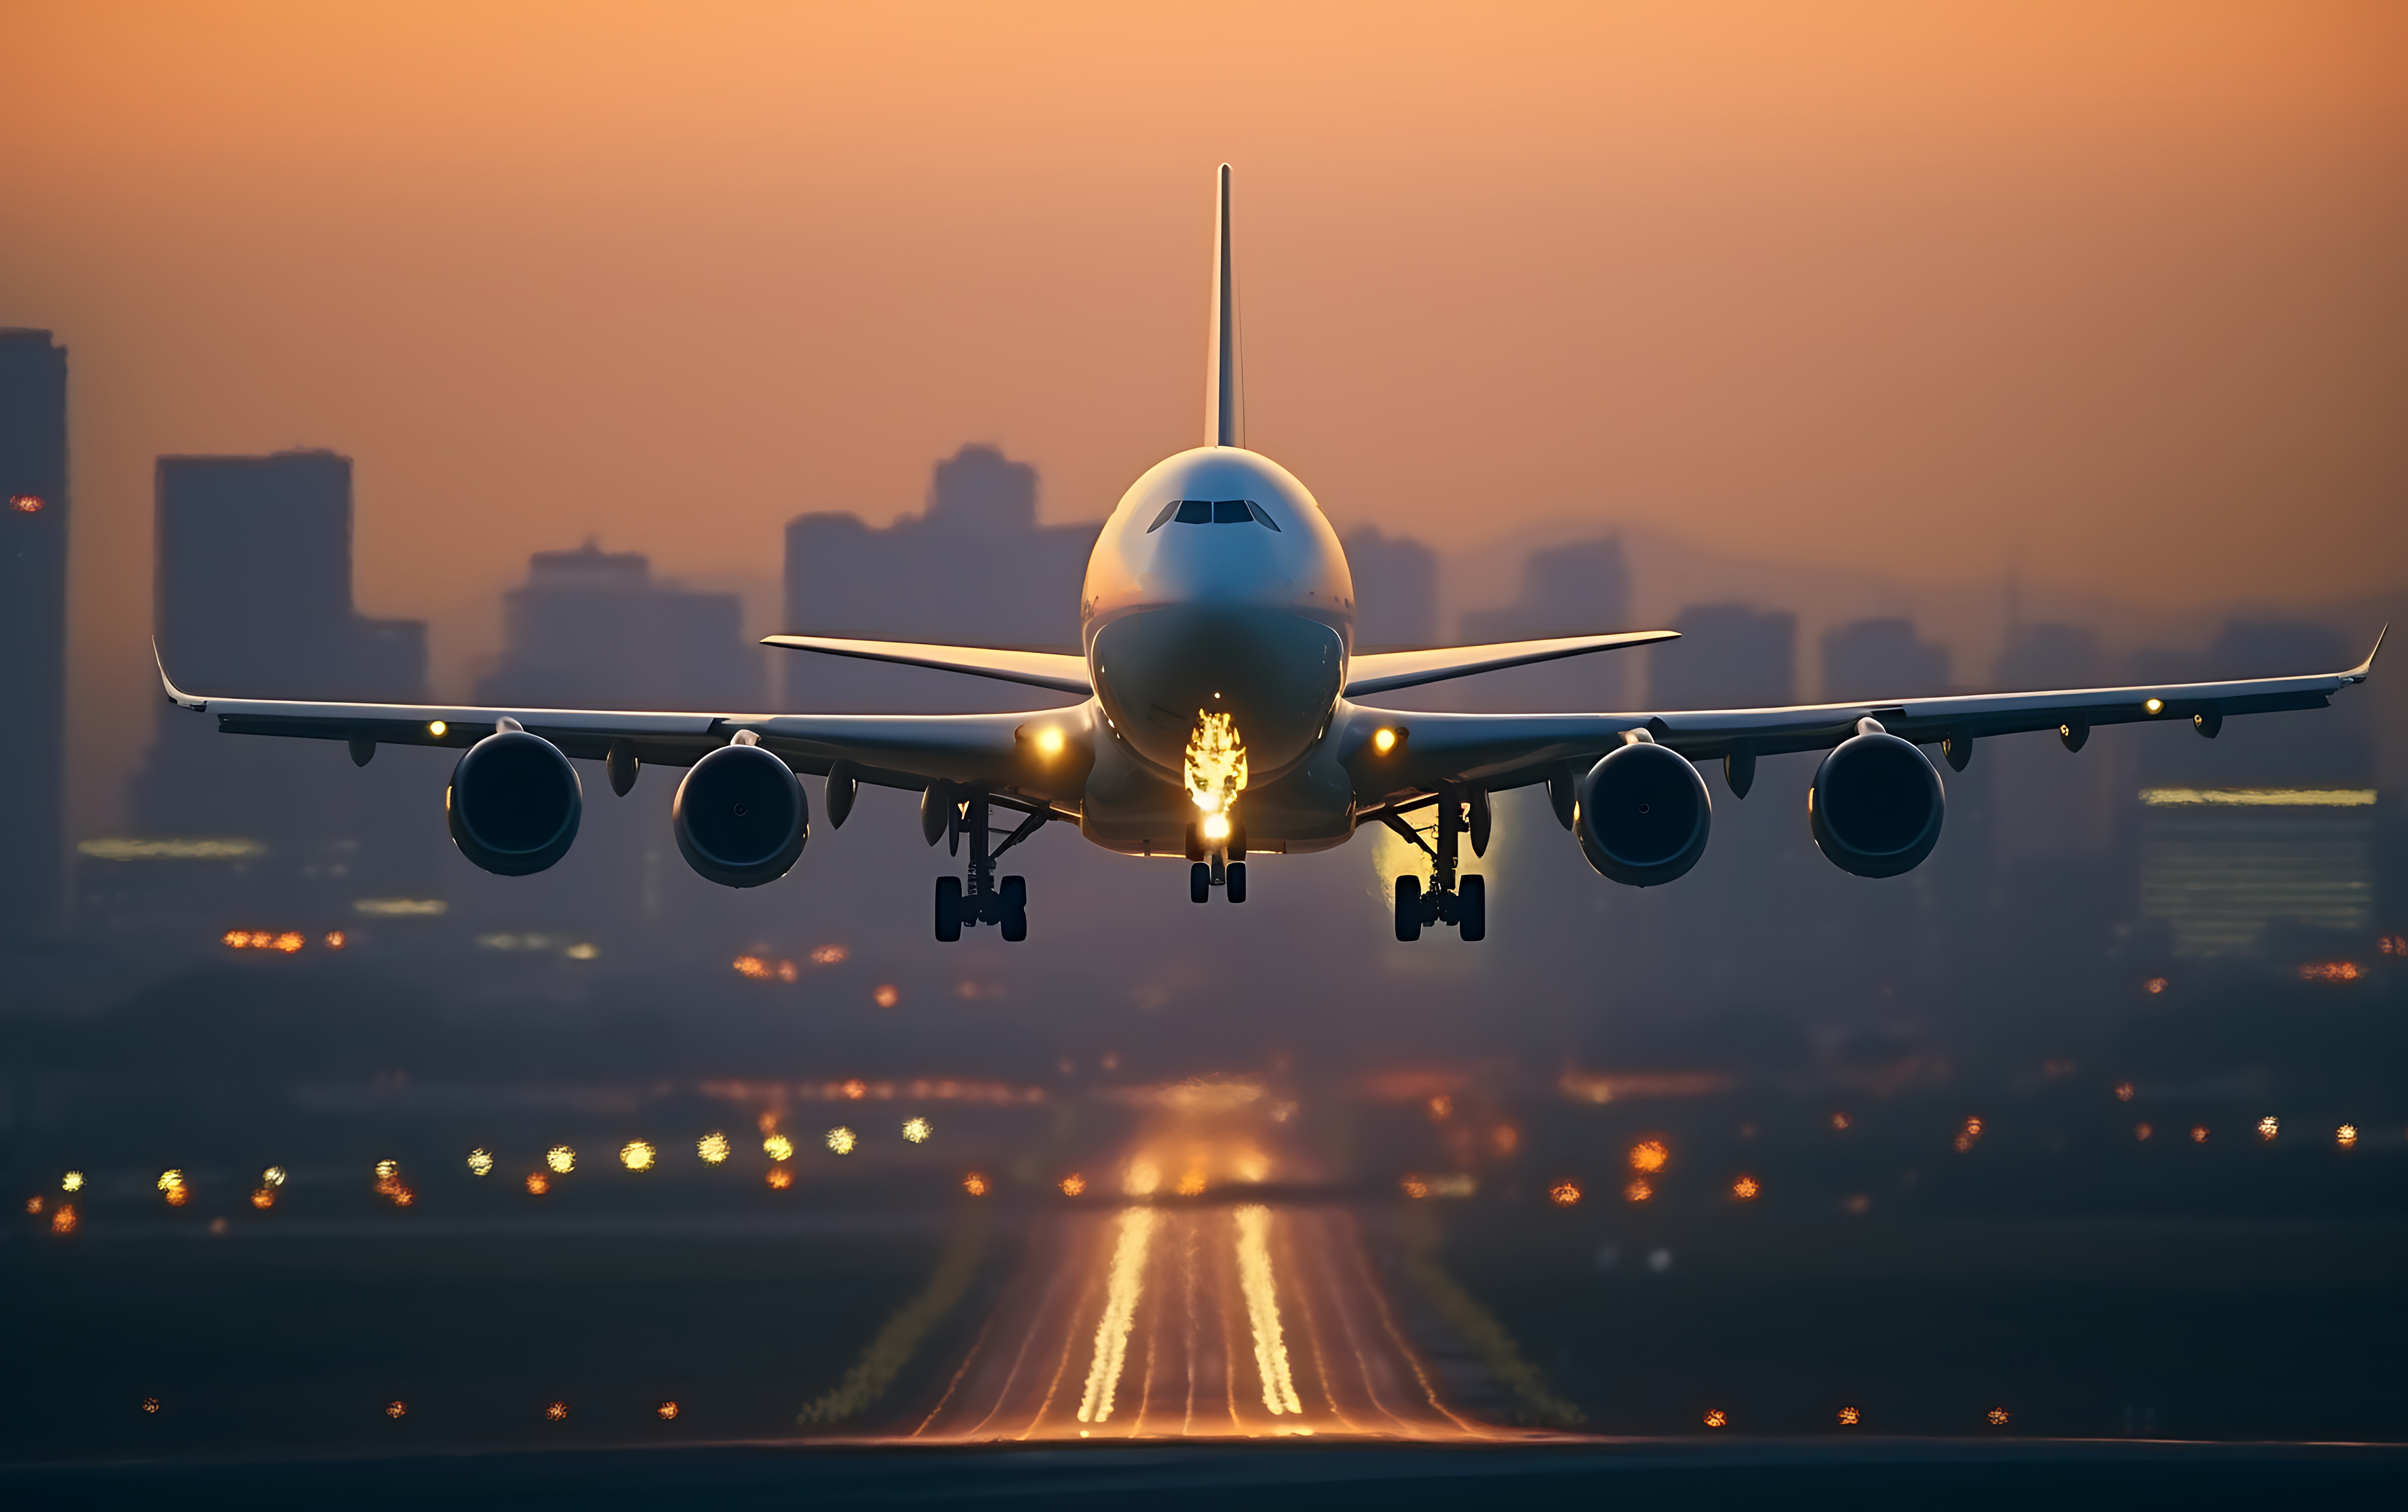

# Introduction

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

# Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score , mean_squared_error ,make_scorer
sns.set_style('darkgrid')
print('All libraries imported succesfully')

All libraries imported succesfully


# Dataset

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

In [3]:
df=pd.read_csv('Datasets/airlineprice.csv')
df

Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           Mumbai   Economy      2.17          1   5953  
1             Morning           Mumbai   Economy      2.33          1   5953  
2       Early_Morning           Mumbai   Economy      2.17          1   5956  
3           Afternoon           Mumbai   Economy      2.25          1   5955  
4             Morning           Mumbai   Economy      2.33          1   5955  
...               ...              ...       ...       ...        ...    ...  
300148        Evening        Hyderabad  Business     10.08         49  69265  
300149          Night        Hyderabad  Business     10.42         49  77105  
300150          Night        Hyderabad  Business     13.83         49  79099  
300151        Evening        Hyderabad  Business     10.00         49  81585  
300152        Evening        Hyderabad  Business     10.08         49  81585  

[300153 rows x 12 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [ ]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

✨ Null values not present in the dataset.

---



✨ Drop 'Unnamed: 0' column.


---



In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

airline   flight source_city departure_time stops   arrival_time  \
0       SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1       SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2        AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3        Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4        Vistara   UK-963       Delhi        Morning  zero        Morning   
...          ...      ...         ...            ...   ...            ...   
300148   Vistara   UK-822     Chennai        Morning   one        Evening   
300149   Vistara   UK-826     Chennai      Afternoon   one          Night   
300150   Vistara   UK-832     Chennai  Early_Morning   one          Night   
300151   Vistara   UK-828     Chennai  Early_Morning   one        Evening   
300152   Vistara   UK-822     Chennai        Morning   one        Evening   

       destination_city     class  duration  days_left  price  
0                Mumbai   Economy      2.17          1   5953  
1                Mumbai   Economy      2.33          1   5953  
2                Mumbai   Economy      2.17          1   5956  
3                Mumbai   Economy      2.25          1   5955  
4                Mumbai   Economy      2.33          1   5955  
...                 ...       ...       ...        ...    ...  
300148        Hyderabad  Business     10.08         49  69265  
300149        Hyderabad  Business     10.42         49  77105  
300150        Hyderabad  Business     13.83         49  79099  
300151        Hyderabad  Business     10.00         49  81585  
300152        Hyderabad  Business     10.08         49  81585  

[300153 rows x 11 columns]

✨ renaming 'class' feature to 'flight_class' since 'class'
is a reserved keyword in 'Python'.


---








In [ ]:
df.rename(columns={'class': 'flight_class'}, inplace=True)

In [ ]:
df

airline   flight source_city departure_time stops   arrival_time  \
0       SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1       SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2        AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3        Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4        Vistara   UK-963       Delhi        Morning  zero        Morning   
...          ...      ...         ...            ...   ...            ...   
300148   Vistara   UK-822     Chennai        Morning   one        Evening   
300149   Vistara   UK-826     Chennai      Afternoon   one          Night   
300150   Vistara   UK-832     Chennai  Early_Morning   one          Night   
300151   Vistara   UK-828     Chennai  Early_Morning   one        Evening   
300152   Vistara   UK-822     Chennai        Morning   one        Evening   

       destination_city flight_class  duration  days_left  price  
0                Mumbai      Economy      2.17          1   5953  
1                Mumbai      Economy      2.33          1   5953  
2                Mumbai      Economy      2.17          1   5956  
3                Mumbai      Economy      2.25          1   5955  
4                Mumbai      Economy      2.33          1   5955  
...                 ...          ...       ...        ...    ...  
300148        Hyderabad     Business     10.08         49  69265  
300149        Hyderabad     Business     10.42         49  77105  
300150        Hyderabad     Business     13.83         49  79099  
300151        Hyderabad     Business     10.00         49  81585  
300152        Hyderabad     Business     10.08         49  81585  

[300153 rows x 11 columns]

# Features

The various features of the cleaned dataset are explained below:

**1) Airline:**


 The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.



**2) Flight:**

Flight stores information regarding the plane's flight code. It is a categorical feature.


**3) Source City:**

 City from which the flight takes off. It is a categorical feature having 6 unique cities.


**4) Departure Time:**

This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.


**5) Stops:**

 A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.


**6) Arrival Time:**

This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

**7) Destination City:**

City where the flight will land. It is a categorical feature having 6 unique cities.

**8) Class:**

A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

**9) Duration:**

A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

**10)Days Left:**

This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

**11) Price:**

Target variable stores information of the ticket price


# Exploratory Data Analysis

In [ ]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

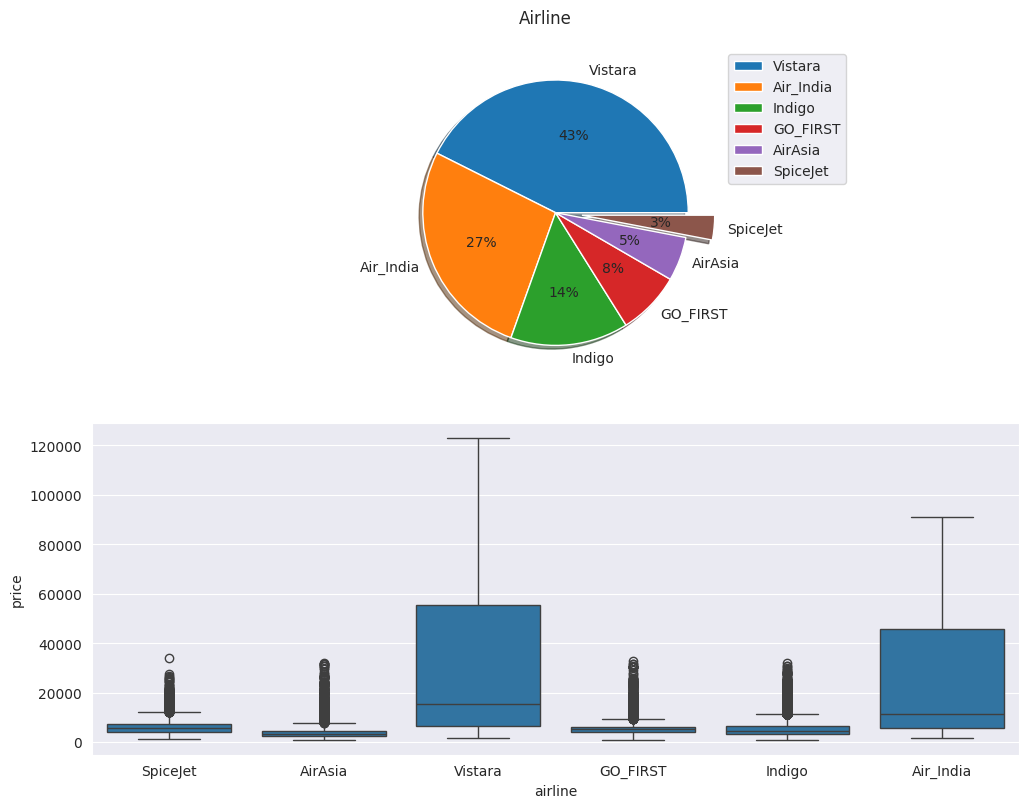

In [ ]:
fig,ax =plt.subplots(2,1,figsize=(10,8))
fig.suptitle('Airline')
plt.tight_layout()
labels=df.airline.value_counts().index.tolist()
explode=(0,0,0,0,0,0.2)
ax[0].pie(df.airline.value_counts(),autopct='%.f%%',labels=labels,shadow=True,explode=explode)
ax[0].legend(bbox_to_anchor=(1,1),loc=2)

sns.boxplot(x='airline',y='price',data=df,ax=ax[1])

plt.show()



*   Most used airline is Vistara (43% , 127859 bookings).
*   Air India and Indigo fall in 2nd and 3rd places.

*   Least booked flight is SpiceJet.
*   Most expensive ticket is sold by Vistara ~ 120000





In [ ]:
len(df.flight.value_counts())

1561

✨ Flight have large no of unique values which makes it
difficult to plot.


---



In [ ]:
df.drop(['flight'],axis=1,inplace=True)

✨ Flight name is like ID which is not neccesary for modeling so, we are dropping it.


---



In [ ]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

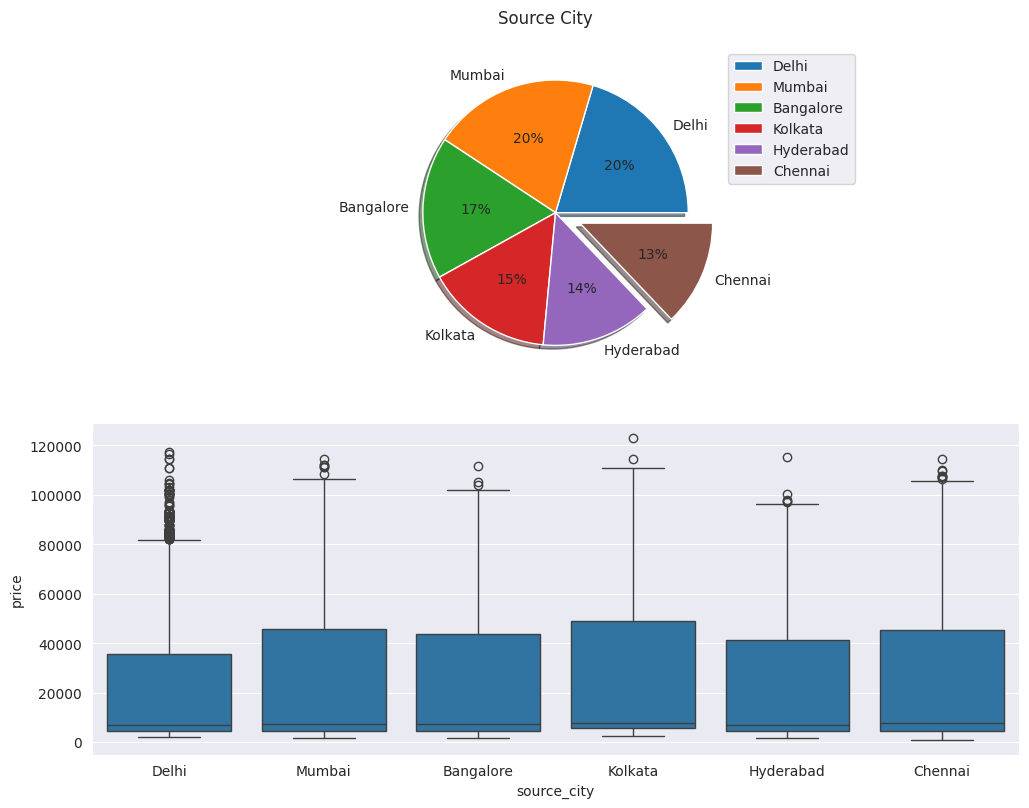

In [ ]:
fig,ax =plt.subplots(2,1,figsize=(10,8))
fig.suptitle('Source City')
plt.tight_layout()
labels=df.source_city.value_counts().index.tolist()
explode=(0,0,0,0,0,0.2)
ax[0].pie(df.source_city.value_counts(),autopct='%.f%%',labels=labels,shadow=True,explode=explode)
ax[0].legend(bbox_to_anchor=(1,1),loc=2)

sns.boxplot(x='source_city',y='price',data=df,ax=ax[1])

plt.show()

✨ No. of flights from all sources is almost equal.


---



In [ ]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

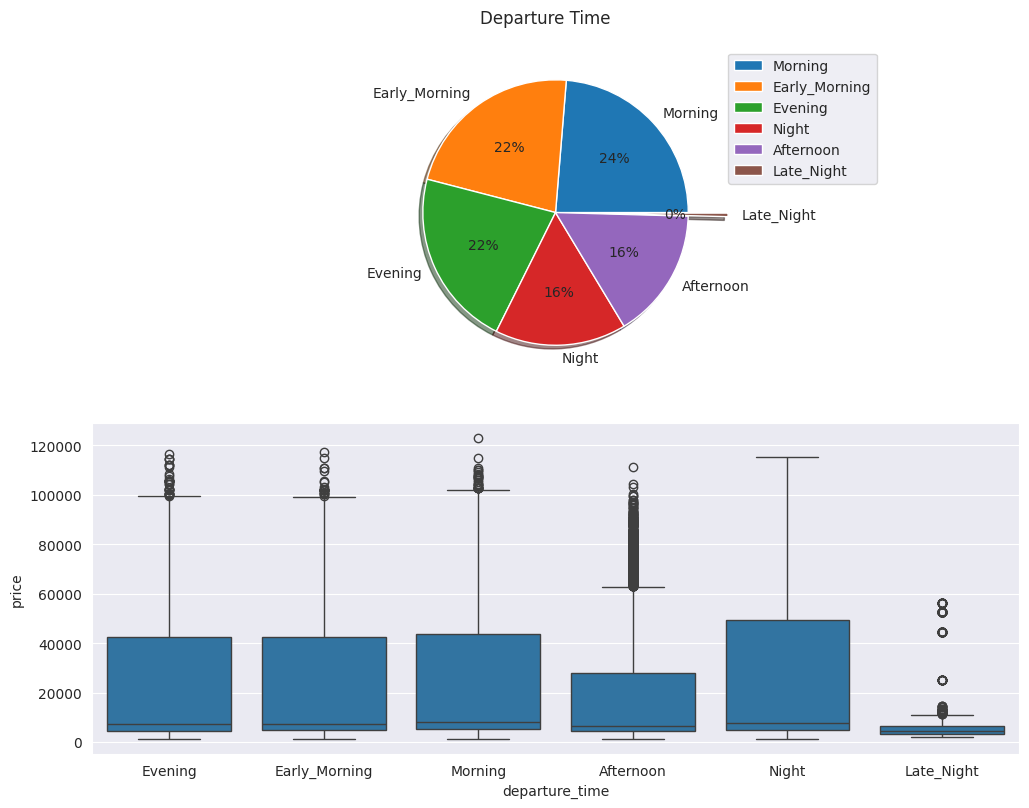

In [ ]:
fig,ax =plt.subplots(2,1,figsize=(10,8))
fig.suptitle('Departure Time')
plt.tight_layout()
labels=df.departure_time.value_counts().index.tolist()
explode=(0,0,0,0,0,0.3)
ax[0].pie(df.departure_time.value_counts(),autopct='%.f%%',labels=labels,shadow=True,explode=explode)
ax[0].legend(bbox_to_anchor=(1,1),loc=2)

sns.boxplot(x='departure_time',y='price',data=df,ax=ax[1])

plt.show()

✨ Departue of flights is less is Late Night and almost equal in rest of the cases.

---



In [ ]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

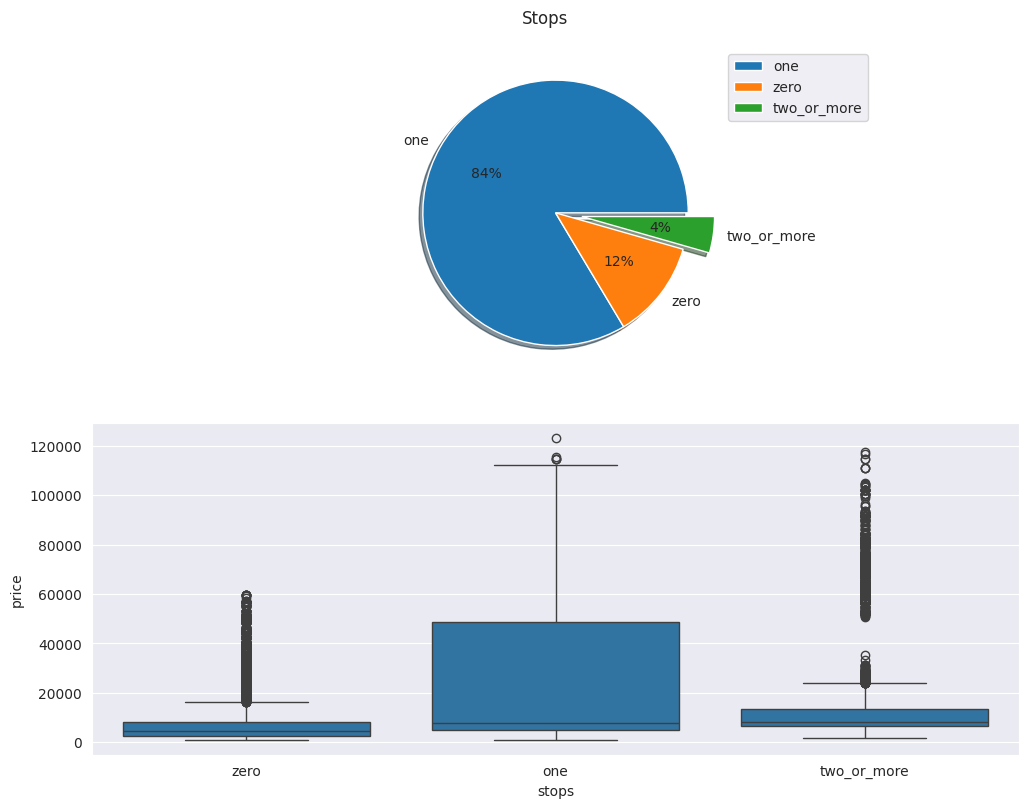

In [ ]:
fig,ax =plt.subplots(2,1,figsize=(10,8))
fig.suptitle('Stops')
plt.tight_layout()
labels=df.stops.value_counts().index.tolist()
explode=(0,0,0.2)
ax[0].pie(df.stops.value_counts(),autopct='%.f%%',labels=labels,shadow=True,explode=explode)
ax[0].legend(bbox_to_anchor=(1,1),loc=2)

sns.boxplot(x='stops',y='price',data=df,ax=ax[1])

plt.show()

✨ Most of the flights have one stop before arrival (84%).


---



In [ ]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

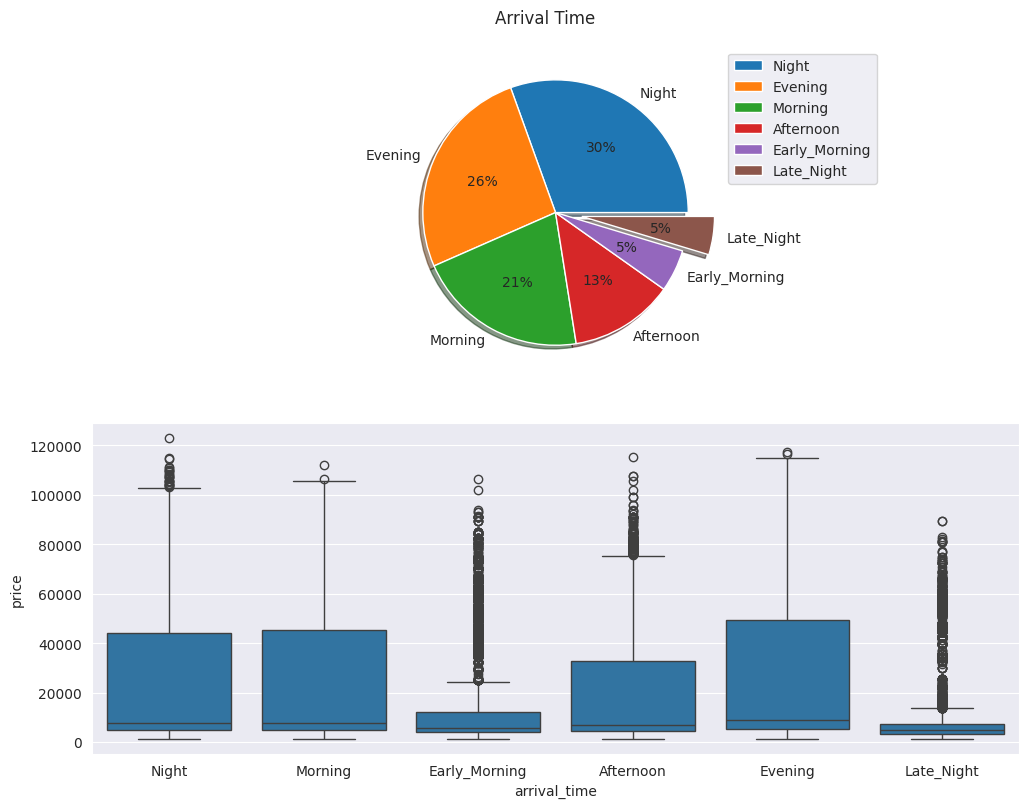

In [ ]:
fig,ax =plt.subplots(2,1,figsize=(10,8))
fig.suptitle('Arrival Time')
plt.tight_layout()
labels=df.arrival_time.value_counts().index.tolist()
explode=(0,0,0,0,0,0.2)
ax[0].pie(df.arrival_time.value_counts(),autopct='%.f%%',labels=labels,shadow=True,explode=explode)
ax[0].legend(bbox_to_anchor=(1,1),loc=2)

sns.boxplot(x='arrival_time',y='price',data=df,ax=ax[1])

plt.show()

In [ ]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

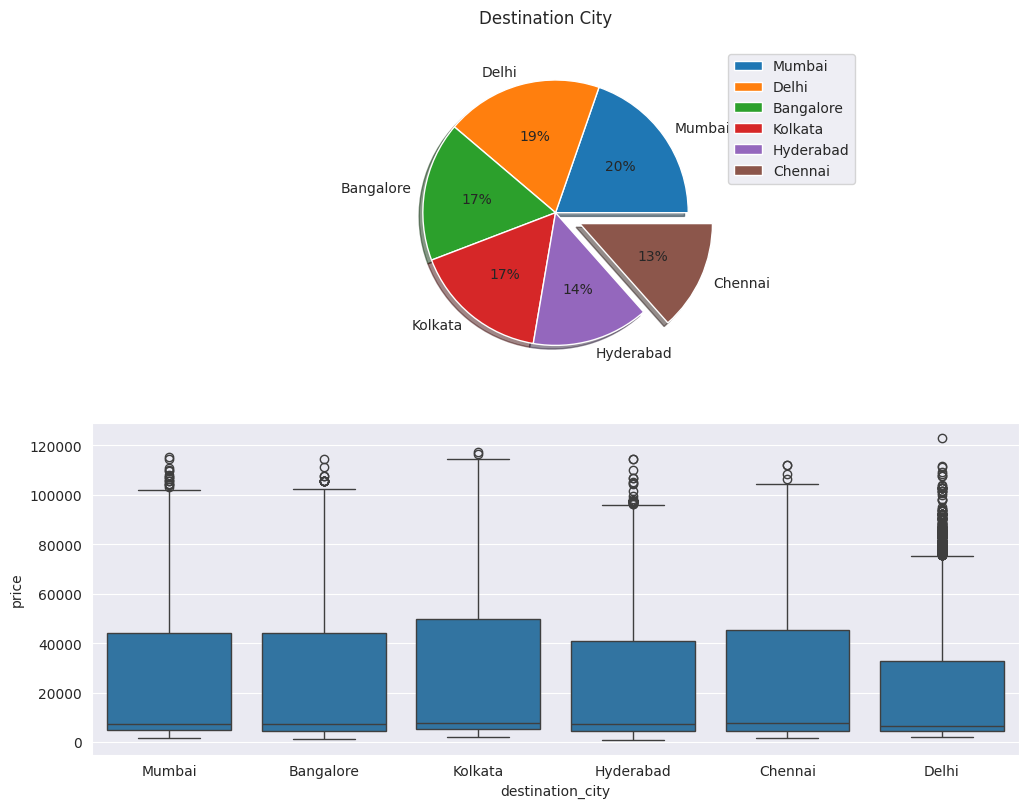

In [ ]:
fig,ax =plt.subplots(2,1,figsize=(10,8))
fig.suptitle('Destination City')
plt.tight_layout()
labels=df.destination_city.value_counts().index.tolist()
explode=(0,0,0,0,0,0.2)
ax[0].pie(df.destination_city.value_counts(),autopct='%.f%%',labels=labels,shadow=True,explode=explode)
ax[0].legend(bbox_to_anchor=(1,1),loc=2)

sns.boxplot(x='destination_city',y='price',data=df,ax=ax[1])

plt.show()

In [ ]:
df.flight_class.value_counts()

flight_class
Economy     206666
Business     93487
Name: count, dtype: int64

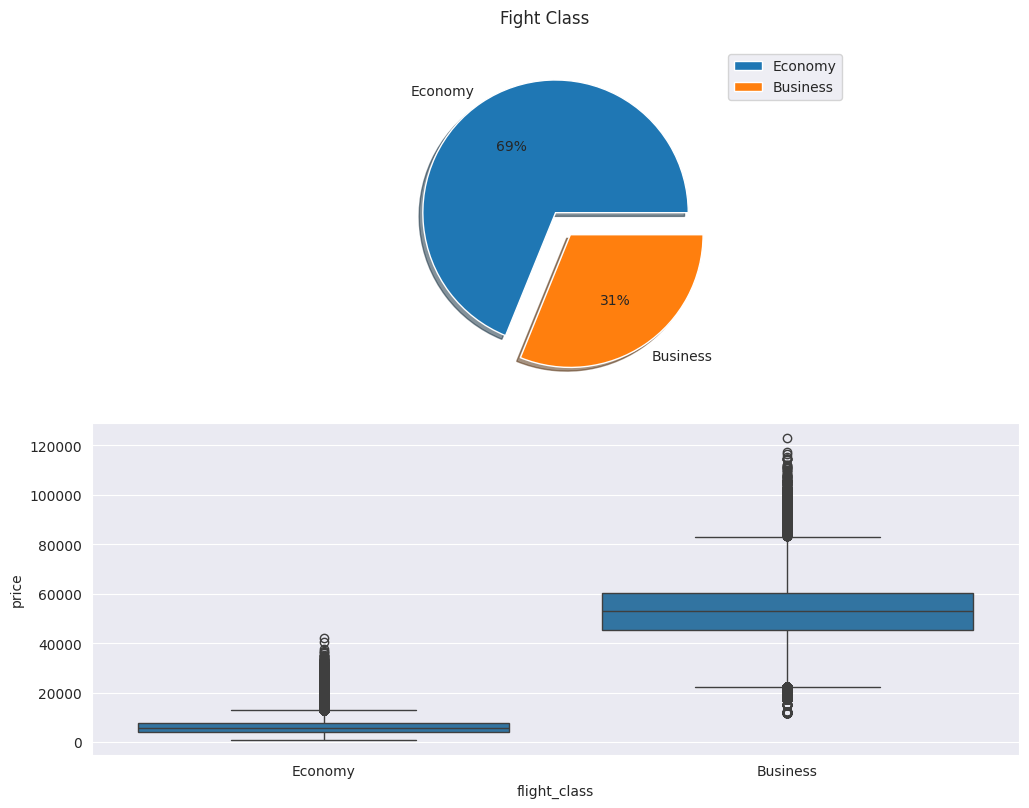

In [ ]:
fig,ax =plt.subplots(2,1,figsize=(10,8))
fig.suptitle('Fight Class')
plt.tight_layout()
labels=df.flight_class.value_counts().index.tolist()
explode=(0,0.2)
ax[0].pie(df.flight_class.value_counts(),autopct='%.f%%',labels=labels,shadow=True,explode=explode)
ax[0].legend(bbox_to_anchor=(1,1),loc=2)

sns.boxplot(x='flight_class',y='price',data=df,ax=ax[1])

plt.show()

✨ 69% of tickets sold is economy class tickets.

In [ ]:
len(df.duration.value_counts())

476

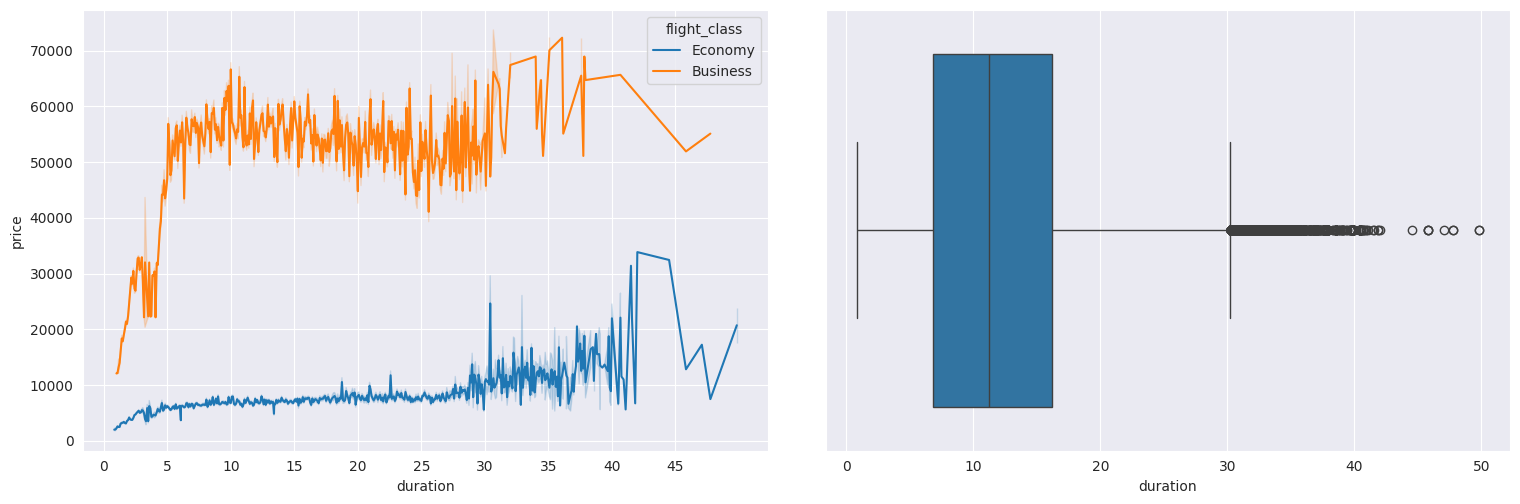

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()
# Left ax
sns.lineplot(x='duration', y='price', data=df, ax=ax[0], hue='flight_class').set_xticks(np.arange(0, 50, 5))
# Right AX
sns.boxplot(data=df, x='duration', ax=ax[1])
plt.show()



*  In Business class, from 1 to 5 hours, price growth sharply.


*   In Business class for durations more than 5, Price in a channel between 45000 to 60000.



*   In Economy class growth of price have a linear growth and for duration=47 have a sharp raise in prices.







In [ ]:
len(df.days_left.value_counts())

49

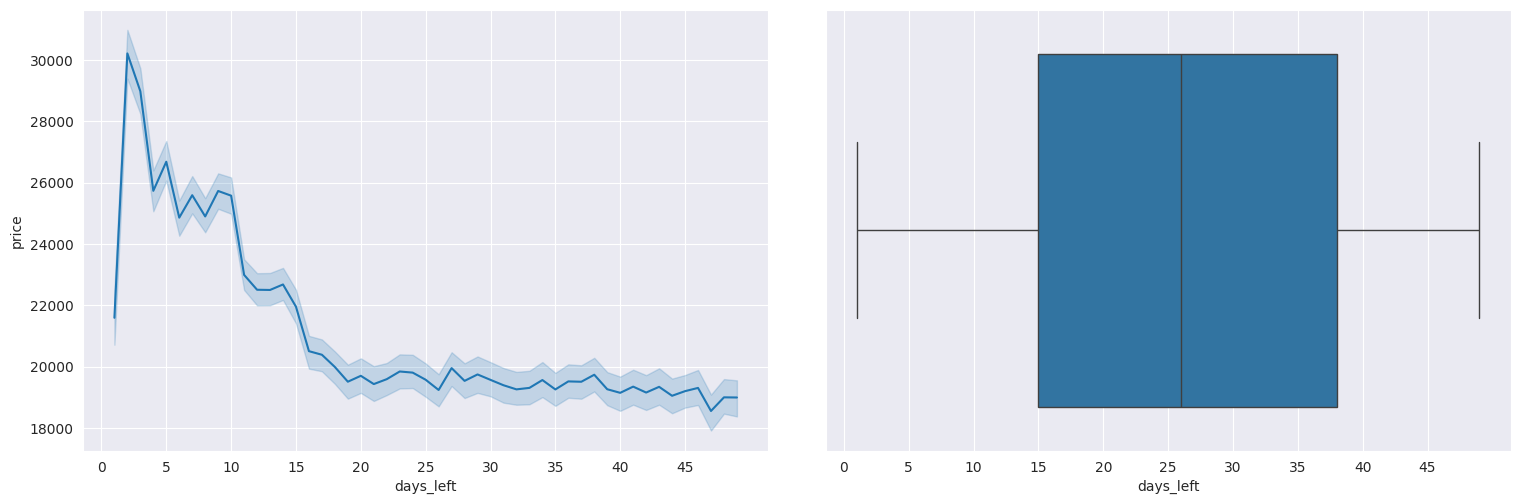

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()
# Left ax
sns.lineplot(x='days_left', y='price', data=df, ax=ax[0]).set_xticks(np.arange(0, 50, 5))
# Right AX
sns.boxplot(data=df, x='days_left', ax=ax[1]).set_xticks(np.arange(0, 50, 5))
plt.show()

✨ The earlier you book your ticket, the less you will pay.


---



# Preprocessing

In [ ]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'flight_class', 'duration', 'days_left', 'price'],
      dtype='object')

In [ ]:
label_encoders={}
cat_columns=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time','destination_city', 'flight_class']
for column in cat_columns :
  le=LabelEncoder()
  df[column]=le.fit_transform(df[column])
  label_encoders[column]=le
df

airline  source_city  departure_time  stops  arrival_time  \
0             4            2               2      2             5   
1             4            2               1      2             4   
2             0            2               1      2             1   
3             5            2               4      2             0   
4             5            2               4      2             4   
...         ...          ...             ...    ...           ...   
300148        5            1               4      0             2   
300149        5            1               0      0             5   
300150        5            1               1      0             5   
300151        5            1               1      0             2   
300152        5            1               4      0             2   

        destination_city  flight_class  duration  days_left  price  
0                      5             1      2.17          1   5953  
1                      5             1      2.33          1   5953  
2                      5             1      2.17          1   5956  
3                      5             1      2.25          1   5955  
4                      5             1      2.33          1   5955  
...                  ...           ...       ...        ...    ...  
300148                 3             0     10.08         49  69265  
300149                 3             0     10.42         49  77105  
300150                 3             0     13.83         49  79099  
300151                 3             0     10.00         49  81585  
300152                 3             0     10.08         49  81585  

[300153 rows x 10 columns]

In [ ]:
df.dtypes

airline               int64
source_city           int64
departure_time        int64
stops                 int64
arrival_time          int64
destination_city      int64
flight_class          int64
duration            float64
days_left             int64
price                 int64
dtype: object

In [ ]:
df.corr()

airline  source_city  departure_time     stops  \
airline           1.000000    -0.028350        0.056885 -0.029838   
source_city      -0.028350     1.000000       -0.004688  0.001819   
departure_time    0.056885    -0.004688        1.000000 -0.008518   
stops            -0.029838     0.001819       -0.008518  1.000000   
arrival_time      0.037714     0.044153       -0.046282  0.010515   
destination_city -0.030172    -0.222935       -0.001761 -0.012846   
flight_class     -0.178862     0.000075       -0.053340  0.100262   
duration         -0.001651     0.008619        0.084348 -0.473860   
days_left        -0.010678    -0.003568       -0.001597 -0.007047   
price             0.243358     0.004594        0.058319 -0.202620   

                  arrival_time  destination_city  flight_class  duration  \
airline               0.037714         -0.030172     -0.178862 -0.001651   
source_city           0.044153         -0.222935      0.000075  0.008619   
departure_time       -0.046282         -0.001761     -0.053340  0.084348   
stops                 0.010515         -0.012846      0.100262 -0.473860   
arrival_time          1.000000         -0.037431     -0.027647  0.008679   
destination_city     -0.037431          1.000000      0.001603  0.001736   
flight_class         -0.027647          0.001603      1.000000 -0.138710   
duration              0.008679          0.001736     -0.138710  1.000000   
days_left            -0.004191         -0.005323      0.013039 -0.039157   
price                 0.042043          0.004795     -0.937860  0.204222   

                  days_left     price  
airline           -0.010678  0.243358  
source_city       -0.003568  0.004594  
departure_time    -0.001597  0.058319  
stops             -0.007047 -0.202620  
arrival_time      -0.004191  0.042043  
destination_city  -0.005323  0.004795  
flight_class       0.013039 -0.937860  
duration          -0.039157  0.204222  
days_left          1.000000 -0.091949  
price             -0.091949  1.000000

<Axes: >

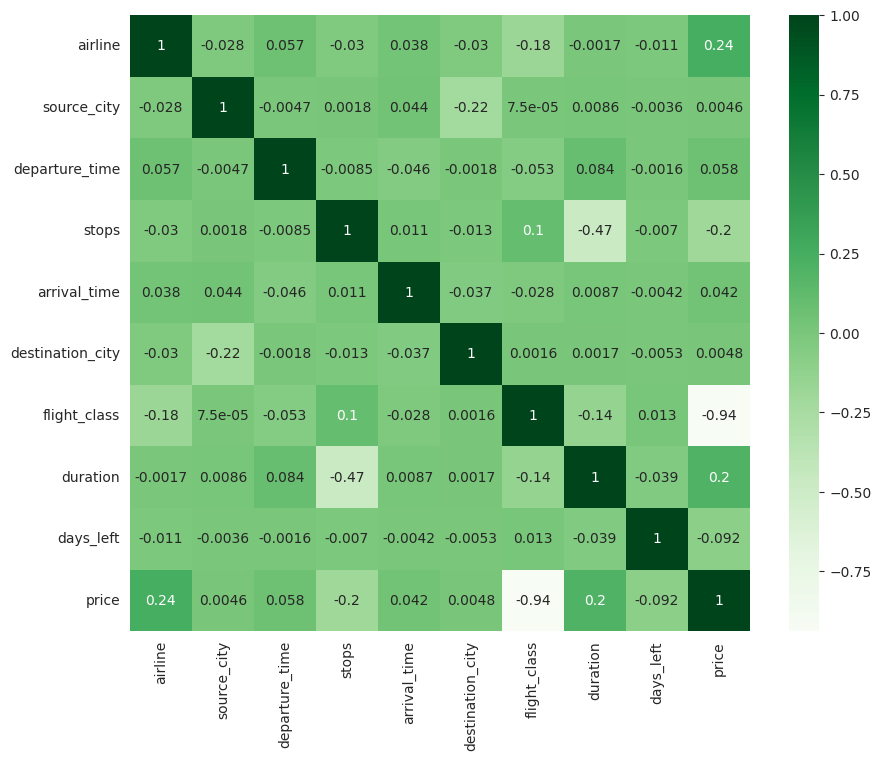

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

In [ ]:
X=df.drop(['price'],axis=1)
X

airline  source_city  departure_time  stops  arrival_time  \
0             4            2               2      2             5   
1             4            2               1      2             4   
2             0            2               1      2             1   
3             5            2               4      2             0   
4             5            2               4      2             4   
...         ...          ...             ...    ...           ...   
300148        5            1               4      0             2   
300149        5            1               0      0             5   
300150        5            1               1      0             5   
300151        5            1               1      0             2   
300152        5            1               4      0             2   

        destination_city  flight_class  duration  days_left  
0                      5             1      2.17          1  
1                      5             1      2.33          1  
2                      5             1      2.17          1  
3                      5             1      2.25          1  
4                      5             1      2.33          1  
...                  ...           ...       ...        ...  
300148                 3             0     10.08         49  
300149                 3             0     10.42         49  
300150                 3             0     13.83         49  
300151                 3             0     10.00         49  
300152                 3             0     10.08         49  

[300153 rows x 9 columns]

In [ ]:
y=df.price
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.15)

# Modeling

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print('R2 Score : ',r2_score(y_test,y_pred))
print('MSE : ',mean_squared_error(y_test,y_pred))

R2 Score :  0.9031655756012889
MSE :  50130020.3505978


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [ ]:
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ab=AdaBoostRegressor()
xg=XGBRegressor()
models=[dt,rf,ab,xg]
for model in models :
  print(model)
  model.fit(X_train,y_train)
  y_pred_m=model.predict(X_test)
  print('R2 Score : ',r2_score(y_test,y_pred_m))
  print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred_m)))


DecisionTreeRegressor()
R2 Score :  0.9757313537455514
RMSE :  3537.9270140806507
RandomForestRegressor()
R2 Score :  0.984722663129699
RMSE :  2807.048531100386
AdaBoostRegressor()
R2 Score :  0.9215192941091138
RMSE :  6362.203320761121
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R2 Score :  0.

In [ ]:
rf1=RandomForestRegressor(random_state=1,min_samples_leaf=5)
rf1.fit(X_train,y_train)
y_pred_rf=rf1.predict(X_test)
print(r2_score(y_test,y_pred_rf))
print(np.sqrt(mean_squared_error(y_test,y_pred_rf)))

0.9853488706141422
2748.917116756036


In [ ]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'flight_class', 'duration', 'days_left', 'price'],
      dtype='object')

In [ ]:
# param_grid = {
#     'n_estimators': [50,100,150],
#     'max_depth': [None,4,6,8,10],
#     'min_samples_split': [2,5,10],
#     'min_samples_leaf': [1,2,4]
# }


# # Define the GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                            scoring='neg_mean_squared_error', cv=5, verbose=3, n_jobs=-1)

# # Fit the GridSearchCV
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best parameters found: ", grid_search.best_params_)
# print("Best R^2 score found: ", grid_search.best_score_)

# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_pred_b = best_model.predict(X_test)
# print('R2 Score : ',r2_score(y_test,y_pred_b))
# print('MSE : ',mean_squared_error(y_test,y_pred_b))

In [ ]:
# import pickle
# pickle.dump(rf1,open('airlineprice.sav','wb'))
# pickle.dump(scaler,open('airlinescaler.sav','wb'))

In [ ]:
# pickle.dump(label_encoders,open('airlineencoders.sav','wb'))

In [ ]:
import joblib
joblib.dump(rf1,'airline_fare_predictor.joblib',compress=5)
joblib.dump(label_encoders,'airline_encoders.joblib')

['airline_encoders.joblib']

In [ ]:
import sklearn
print(sklearn.__version__)


1.3.2
